#### On the dataset 
The file given below contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

/kaggle/input/bank-personal/Bank_Personal_Loan_Modelling.csv


In [2]:
data=pd.read_csv("/kaggle/input/bank-personal/Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

#### Information on the features or attributes

The attributes can be divided accordingly :
* The variable **ID** does not add any interesting information. There is no association between a person's customer ID  and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? ** This is our target variable**
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code

In [5]:
data.shape

(5000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# No columns have null data in the file
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Eye balling the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

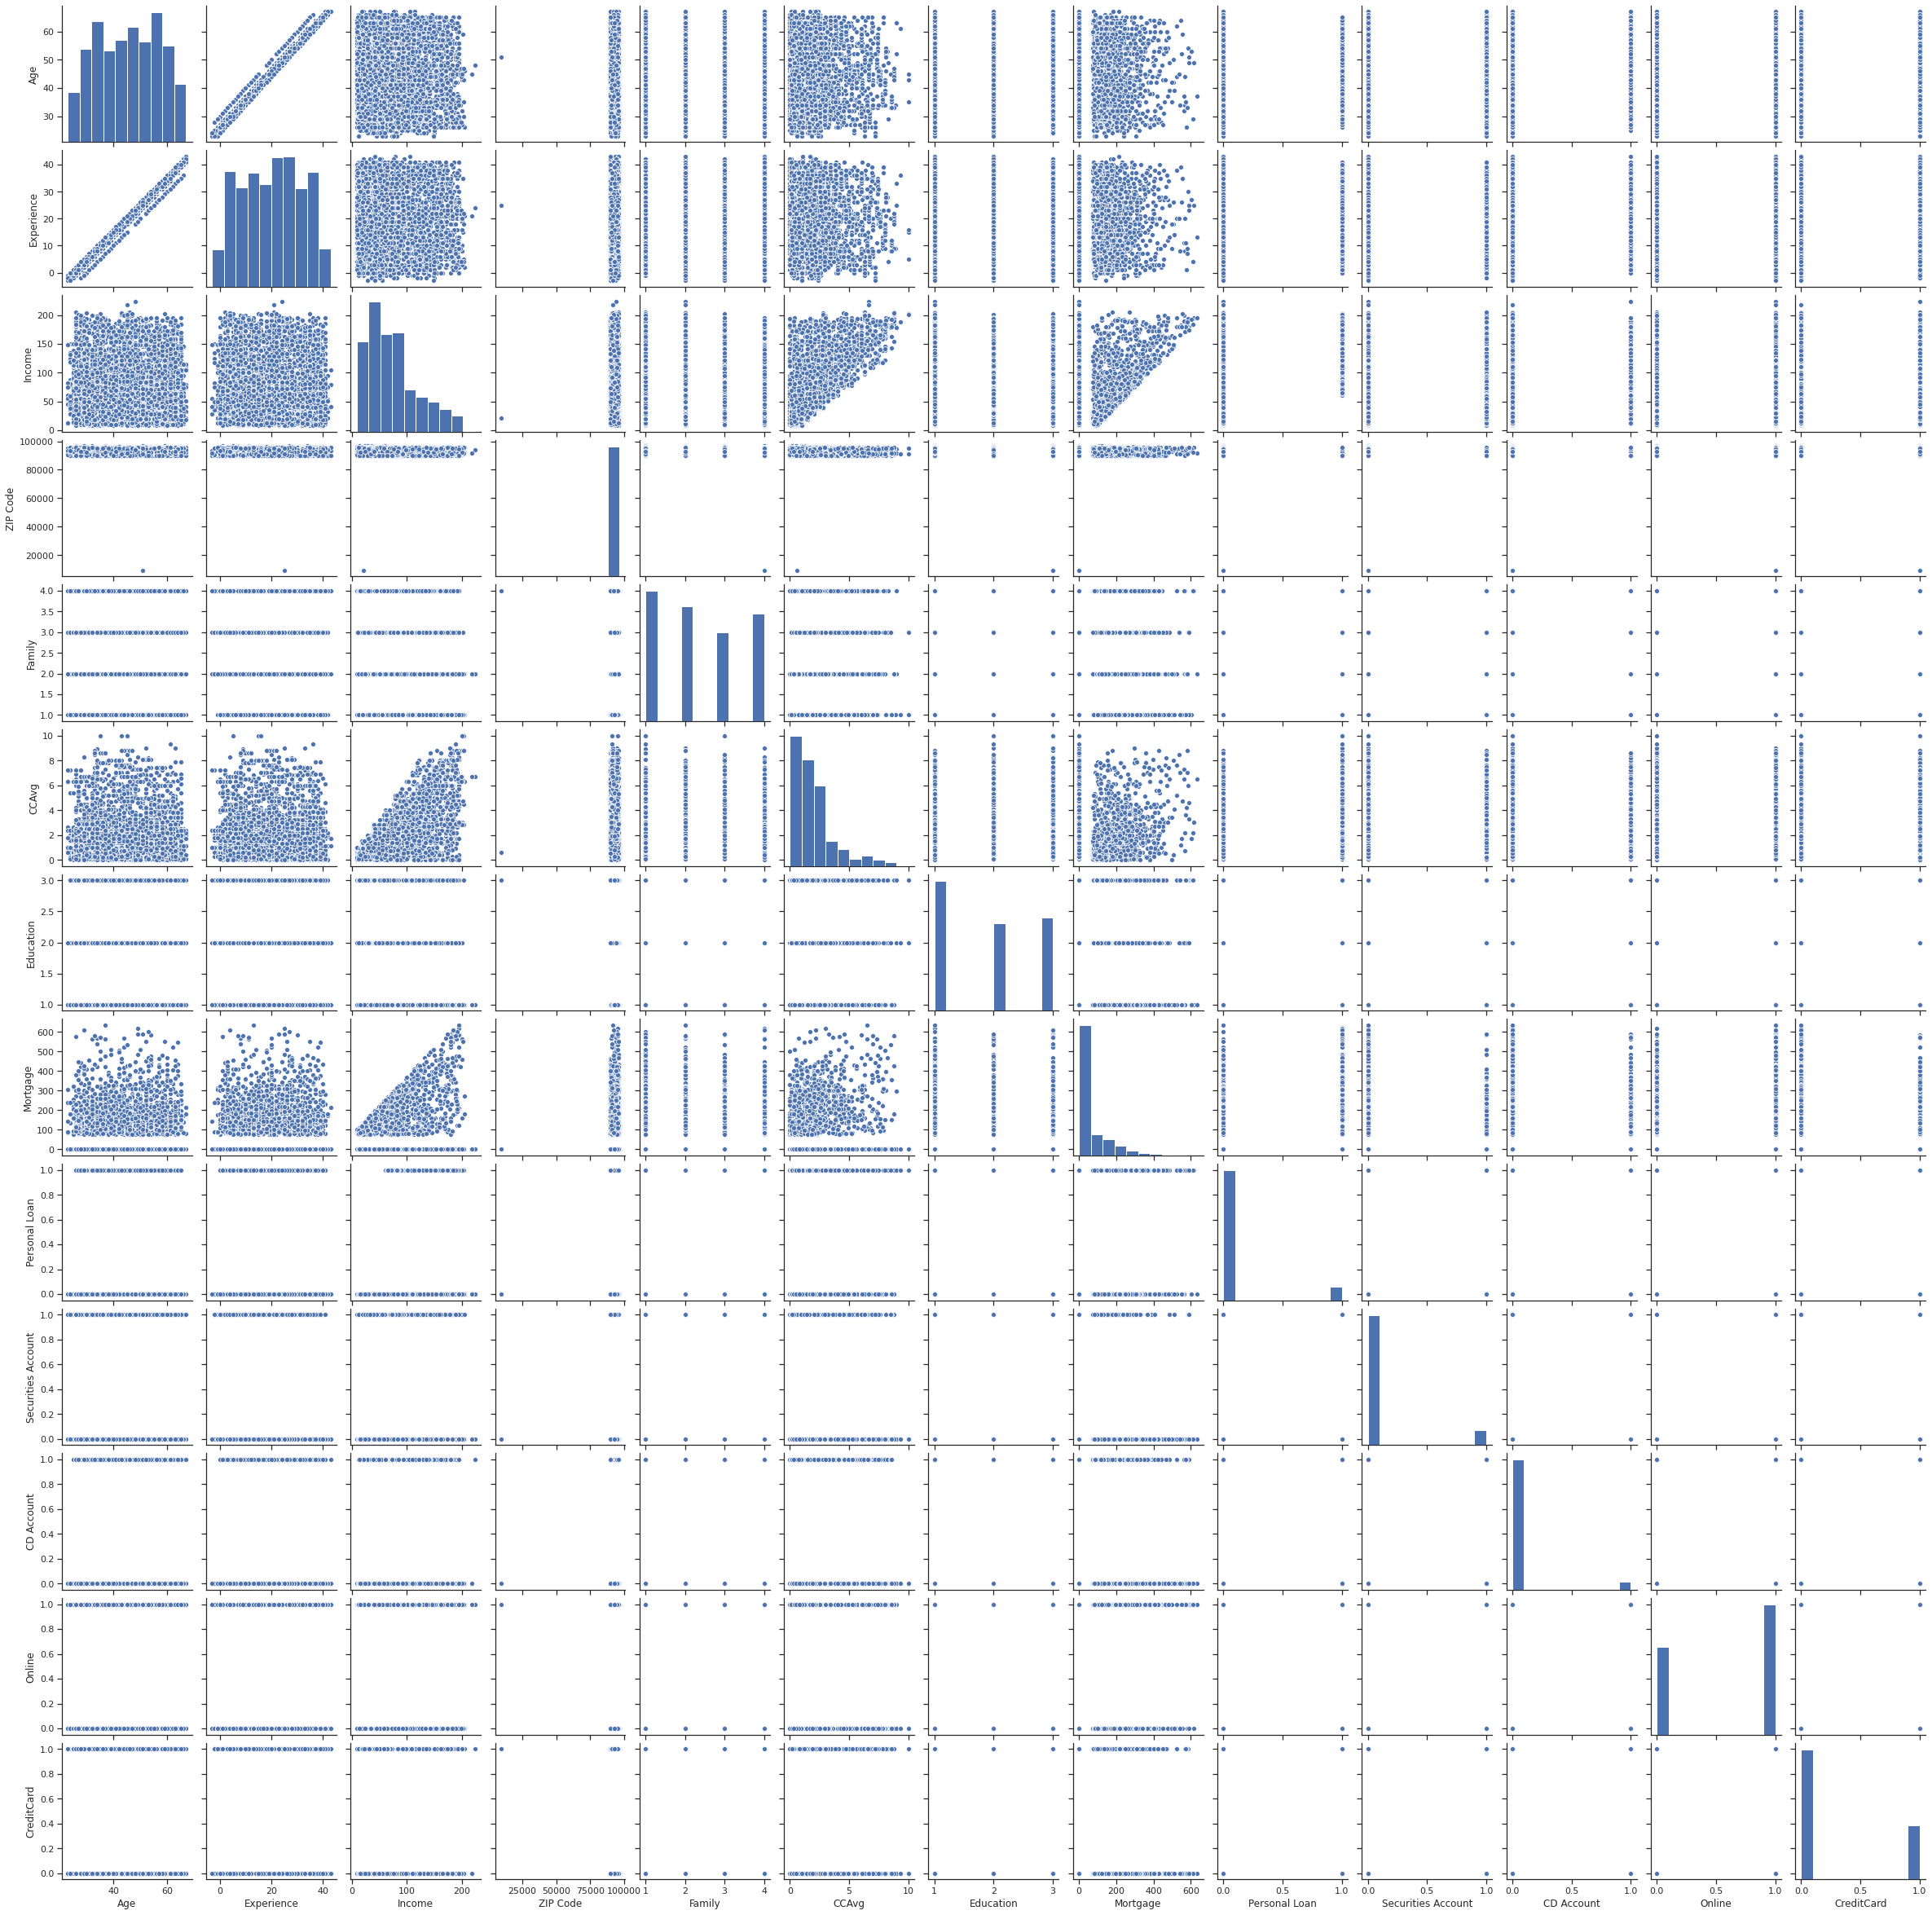

In [10]:
sns.pairplot(data.iloc[:,1:])

* **Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the `describe` statement above, which shows **mean** is almost equal to **median**
* **Experience** is normally distributed with more customer having experience starting from 8 years. Here the **mean** is equal to **median**. There are negative values in the **Experience**. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* **Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the **mean** is greater than the **median**
* **CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* **Mortgage**  70% of the individuals have a mortgage of less than 40K. However the max value is 635K
* **Education** It has three categories as follows 1: Undergrad; 2: Graduate; 3: Advanced/Professional(We will use get dummies for better results)
* The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [11]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
data[data['Experience'] < 0]['Experience'].count()

52

In [12]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [13]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

The following code does the below steps:
* For the record with the ID, get the value of `Age` column
* For the record with the ID, get the value of `Education` column
* Filter the records matching the above criteria from the data frame which has records with positive experience and take the median
* Apply the median back to the location which had negative experience

In [14]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    if(len(df_filtered)==0):
        #Match with education if there is no match with age and education.
        df_filtered = dfExp[(dfExp.Education == education)]
    if(len(df_filtered)==0):
        df_filtered = dfExp[(dfExp.Age == age)]
    if(len(df_filtered)==0):#Replace with median if there is no match found.
        df_filtered = dfExp[(dfExp.Experience == dfExp.Experience.median())]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [15]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.245800,11.326338,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [17]:
# Making the ZIP Code to object data type as it is a categorical variable. 
data["ZIP Code"]=data["ZIP Code"].astype("object")

### Influence of Attributes on personal loan 

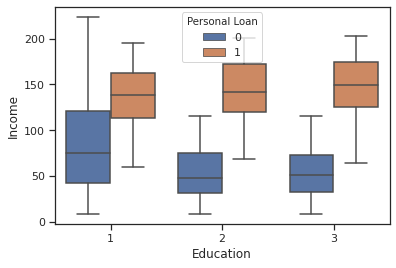

In [18]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

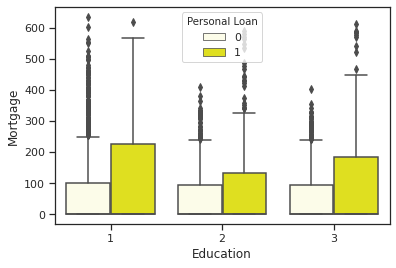

In [19]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

**Inference** : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

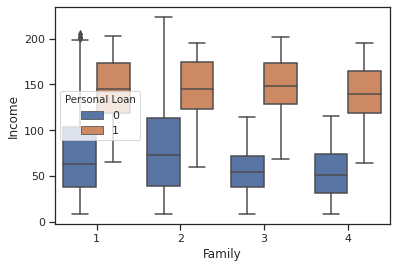

In [20]:
sns.boxplot(x=data.Family,y=data.Income,hue=data["Personal Loan"])

 **Inference** : Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income

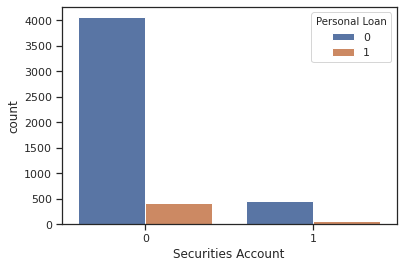

In [21]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

**Observation** : Majority of customers who does not have loan have securities account

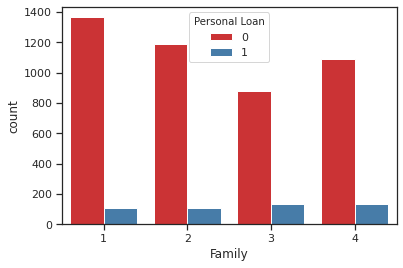

In [22]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

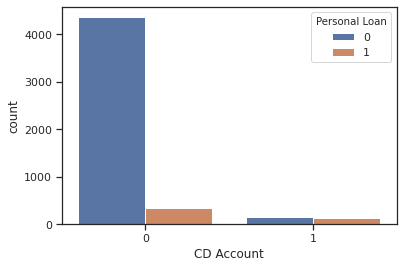

In [23]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

**Observation**: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

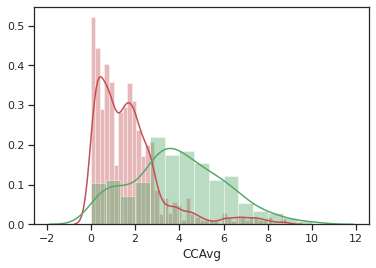

In [24]:
sns.distplot( data[data["Personal Loan"] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data["Personal Loan"] == 1]['CCAvg'], color = 'g')

In [25]:
print('Credit card spending of Non-Loan customers: ',data[data["Personal Loan"] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data["Personal Loan"] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan.  Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

Text(0, 0.5, 'Age')

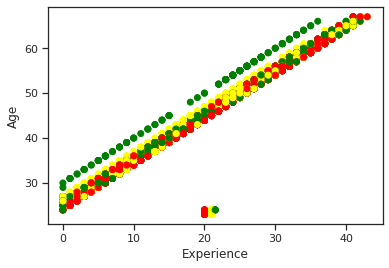

In [26]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

**Observation** The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

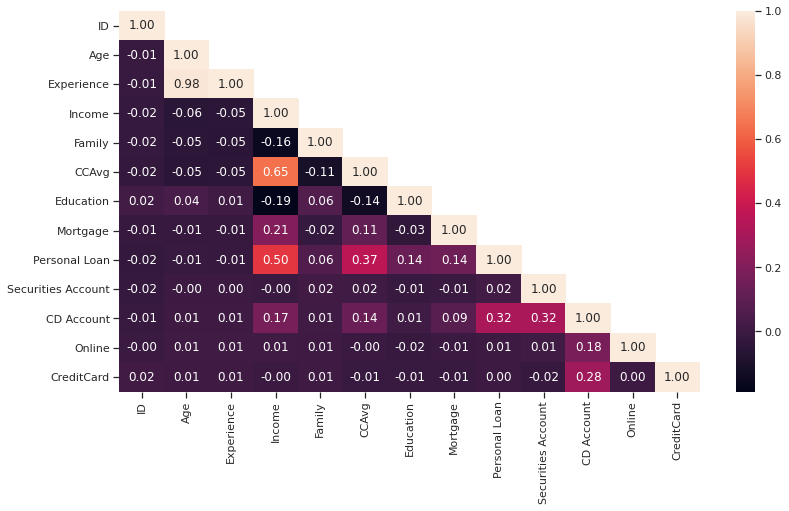

In [27]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')

**Observation**
* Income and CCAvg is moderately correlated. 
* Age and Experience is highly correlated

In [28]:
#lets add dummies to education attribute
dummies=pd.get_dummies(data.Education , prefix='Education')
data=data.drop("Education",axis=1)
data=data.join(dummies)

In [29]:
loanY=len(data[data["Personal Loan"] == 1])
loanN=len(data[data["Personal Loan"] == 0])
print('Percentage of people who took loan is ',(loanY/(loanY+loanN))*100,'%')
print('Percentage of people who didn\'t took loan is ',(loanN/(loanY+loanN))*100,'%')

Percentage of people who took loan is  9.6 %
Percentage of people who didn't took loan is  90.4 %


## Applying models

## Logistic Regression

#### Spliting the data 
We will use 70% of data for training and 30% for testing.

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop(['ID','Personal Loan'],axis=1)
Y = data['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
1334,47,22.0,35,94304,2,1.3,0,0,0,1,0,1,0,0
4768,38,14.0,39,93118,1,2.0,0,0,0,1,0,0,1,0
65,59,35.0,131,91360,1,3.8,0,0,0,1,1,1,0,0
177,29,3.0,65,94132,4,1.8,244,0,0,0,0,0,1,0
4489,39,13.0,21,95518,3,0.2,0,0,0,1,0,0,1,0


Now lets check loan taken True/False ratio in split data 

In [31]:
print("Original  True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original  False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training  True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training  False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test  True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test  False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original  True Values    : 480 (9.60%)
Original  False Values   : 4520 (90.40%)

Training  True Values    : 331 (9.46%)
Training  False Values   : 3169 (90.54%)

Test  True Values        : 149 (9.93%)
Test  False Values       : 1351 (90.07%)



In [32]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000107 -0.004695  0.036017 -0.000065  0.016179  0.010012  0.000834   

         7         8        9        10        11        12        13  \
0  0.00057  0.004988 -0.00019 -0.000071 -0.011828  0.005771  0.005944   

   intercept  
0  -0.000112  


In [33]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9066666666666666


[[  43  106]
 [  34 1317]]


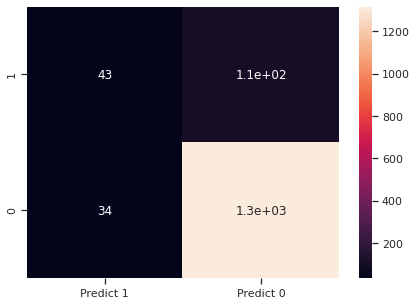

In [34]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that the person takes loan is 43

True Negatives (TN): we correctly predicted that they don't take loan 1317

False Positives (FP): we incorrectly predicted that the person takes loan (a "Type I error") 34 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't takes loan (a "Type II error") 106 Falsely predict negative Type II error

.

## Build kNN Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 9 , metric='euclidean')

In [36]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

#### Evaluate Performance of kNN Model

In [37]:
# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.902

Confusion Matrix
[[  20  129]
 [  18 1333]]


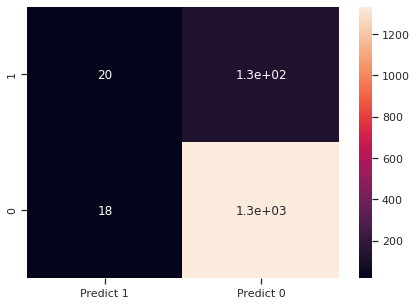

In [38]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

.

## Naive Bayes algorithm 

In [39]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

GaussianNB()

### Performance of our model with training data

In [40]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))

Model Accuracy: 0.9009


### Performance of our model with testing data

In [41]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8920



### Lets check the confusion matrix and classification report 

Confusion Matrix
[[  86   63]
 [  99 1252]]


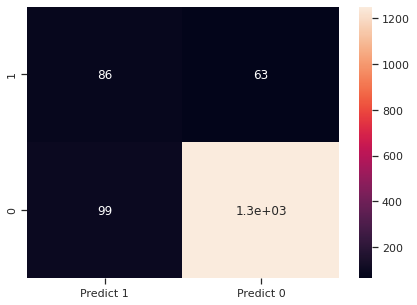

In [42]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [43]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.46      0.58      0.51       149
           0       0.95      0.93      0.94      1351

    accuracy                           0.89      1500
   macro avg       0.71      0.75      0.73      1500
weighted avg       0.90      0.89      0.90      1500



.

#### The above scores of the algorithms are as follows:
* Logistic Regression : 90.66
* KNN : 90.2
* Naive Bayes : 89.2

From the above it is clear that there is no major difference between the algorithms but **Logistic Regression** and **KNN** performs best among all of these.

#### Lets compare these algorithms by splitting the data in to 10 parts as below.

### Model comparison

In [44]:
X_comp=data.drop(['Personal Loan','ID'],axis=1)
Y_comp=data['Personal Loan']

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.906200 (0.007181)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.897200 (0.007808)
NB: 0.898200 (0.007346)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


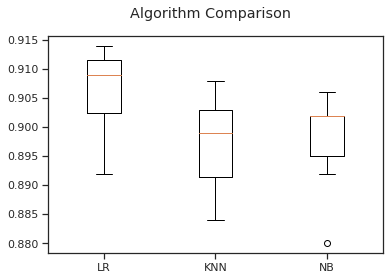

In [45]:
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 9 , metric='euclidean')))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_comp, Y_comp, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Conclusion
The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like **Logistic Regression** algorithm have the highest accuracy and we can choose that as our final model